# Lesson 1.1: Images and Vectors
$_\text{Digital Image Processing | D.J.D. Lopez | 2026}$


Linear algebra is one of the core mathematical tools behind modern image processing, computer vision, and deep learning. 
Operations such as denoising, sharpening, compression, and even high-level tasks like face recognition or object detection can ultimately be expressed using vectors, matrices, and tensors.

In this notebook, we will use **digital images** as a running example to build intuition for these linear algebra objects.  
Instead of treating vectors and matrices as purely abstract arrays of numbers, we will see how they arise naturally when working with pixel intensities and color channels in real images.

## Why images?

Digital image processing is a particularly effective context for learning linear algebra because it is both visual and concrete.

- Every pixel in an image is stored as one or more numeric values.  
- A grayscale image can be viewed as a matrix of intensities.  
- A color image can be viewed as a tensor with separate channels (e.g., blue, green, red).

This makes it possible to *see* the effect of linear algebra operations: a small change in a matrix or tensor often produces a visible change in the image, which helps develop intuition about abstract concepts.

1. **Understanding the basic objects**  
   - Scalars, vectors, matrices, and tensors, and how they relate to each other.  
   - How these objects naturally appear when representing digital images and collections of images.

2. **Images as numerical data**  
   - How a color image is stored as a 3D array of pixel values (channels, height, width).  
   - How a grayscale image is stored as a 2D array (height, width) of intensities.

3. **Hands-on manipulation using OpenCV**  
   Using the OpenCV library in Python, we will:
   - Load an image and inspect its pixel values, shapes, and data types.  
   - Access and modify individual pixels and small regions to understand what the numbers mean.  
   - Create a **grayscale** version of a color image in two ways:
     - With OpenCV's built-in conversion functions.  
     - By manually combining color channels as a simple linear operation on vectors of pixel values.

# 1. Vectors and Matrices

To work with vectors and matrices in this notebook, we will use the **NumPy** library, which provides the `ndarray` type for numerical arrays. In NumPy, 1D arrays naturally represent vectors, while 2D arrays represent matrices.

- A **vector** in $\mathbb{R}^n$ will be a 1D array of shape `(n,)`.  
- A **matrix** in $\mathbb{R}^{m \times n}$ will be a 2D array of shape `(m, n)`.  

This convention works well with images, where:
- Rows and columns of an image are naturally 1D vectors.  
- A grayscale image is a 2D matrix of pixel intensities.

In [1]:
import numpy as np

## 1.1 Vectors
Intuitively, a **vector** is an ordered list of numbers.  
Geometrically, a vector in $\mathbb{R}^n$ can represent a point or an arrow in $n$-dimensional space; algebraically, it is an object we can add and scale.

We represent a vector in $\mathbb{R}^3$ as:


In [2]:
v = np.array([1.0, 2.0, 3.0])

print("Vector v:", v)
print("Shape of v:", v.shape)   # (3,)

Vector v: [1. 2. 3.]
Shape of v: (3,)


Key points:

- `v` is 1D, not explicitly a row or column vector; its shape is `(3,)`.
- When a specific orientation is needed (row vs column), we make it 2D explicitly:

In [4]:
print("First component v =", v)
print("Second component v =", v[1])
print("Third component v =", v[2])

First component v = [1. 2. 3.]
Second component v = 2.0
Third component v = 3.0


In [8]:
row_v = v[np.newaxis, :]   # shape (1, 3)
col_v = v[:, np.newaxis]   # shape (3, 1)

print("row_v.shape =", row_v.shape)
print("col_v.shape =", col_v.shape)

row_v.shape = (1, 3)
col_v.shape = (3, 1)


### Basic vector operations

Let $u, v \in \mathbb{R}^n$ be vectors and let $\alpha \in \mathbb{R}$ be a scalar.

1. **Vector addition**

Given
$$
u = (u_1, u_2, \dots, u_n), \quad
v = (v_1, v_2, \dots, v_n),
$$
their sum $u + v$ is defined componentwise by
$$
u + v = (u_1 + v_1,\; u_2 + v_2,\; \dots,\; u_n + v_n).
$$

2. **Scalar multiplication**

Given a scalar $\alpha$ and a vector
$$
v = (v_1, v_2, \dots, v_n),
$$
the scaled vector $\alpha v$ is
$$
\alpha v = (\alpha v_1,\; \alpha v_2,\; \dots,\; \alpha v_n).
$$




In [9]:
u = np.array([1.0, 1.0, 1.0])
v = np.array([2.0, 3.0, 4.0])

# Vector addition
w = u + v

# Scalar multiplication
alpha = 0.5
z = alpha * v

print("u =", u)
print("v =", v)
print("u + v =", w)
print("0.5 * v =", z)

u = [1. 1. 1.]
v = [2. 3. 4.]
u + v = [3. 4. 5.]
0.5 * v = [1.  1.5 2. ]


3. **Dot product (inner product)**

The dot product of $u$ and $v$ is
$$
u \cdot v = u_1 v_1 + u_2 v_2 + \cdots + u_n v_n.
$$



In [10]:
u = np.array([1, 2, 3], dtype=float)
v = np.array([4, 5, 6], dtype=float)

dot_uv = np.dot(u, v)
dot_uc = u@v

dot_uv

np.float64(32.0)

4. **Euclidean norm**

The Euclidean (or $\ell^2$) norm of $v$ is
$$
\|v\|_2 = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}.
$$

In [11]:
v = np.array([3.0, 4.0])
norm_v = np.linalg.norm(v)

print("v =", v)
print("||v||_2 =", norm_v)

v = [3. 4.]
||v||_2 = 5.0


## 1.2 Matrices

A **matrix** is a rectangular array of numbers.  
Mathematically, a matrix with $m$ rows and $n$ columns is an element of $\mathbb{R}^{m \times n}$:
$$
A =
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn}
\end{bmatrix}.
$$

In NumPy, we represent matrices as **2D arrays** with shape `(m, n)`.

In [14]:
A = np.array([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
])

print("A =\n", A)
print("A.shape =", A.shape)   # (2, 3)

A =
 [[1. 2. 3.]
 [4. 5. 6.]]
A.shape = (2, 3)


Here:

- The first dimension is the number of **rows** ($m = 2$).  
- The second dimension is the number of **columns** ($n = 3$).  

Each row and each column of a matrix is naturally a vector:

- Row $i$ is
  $$
  \operatorname{row}_i(A) = (a_{i1}, a_{i2}, \dots, a_{in}) \in \mathbb{R}^n.
  $$
- Column $j$ is
  $$
  \operatorname{col}_j(A) =
  \begin{bmatrix}
  a_{1j} \\
  a_{2j} \\
  \vdots \\
  a_{mj}
  \end{bmatrix}
  \in \mathbb{R}^m.
  $$

In [15]:
# i-th row (as a 1D vector)
i = 0
row_i = A[i, :]          # shape (n,)
print("row_i =", row_i, "shape =", row_i.shape)

# j-th column (as a 1D vector)
j = 1
col_j = A[:, j]          # shape (m,)
print("col_j =", col_j, "shape =", col_j.shape)


row_i = [1. 2. 3.] shape = (3,)
col_j = [2. 5.] shape = (2,)


#### Matrix-Vector Products

Let $A \in \mathbb{R}^{m \times n}$ and $x \in \mathbb{R}^n$.  
The matrix-vector product $Ax$ is a vector in $\mathbb{R}^m$ whose $i$-th component is
$$
(Ax)_i = \sum_{j=1}^{n} a_{ij} x_j, \qquad i = 1, \dots, m.
$$
Equivalently,
$$
Ax =
\begin{bmatrix}
\operatorname{row}_1(A) \cdot x \\
\operatorname{row}_2(A) \cdot x \\
\vdots \\
\operatorname{row}_m(A) \cdot x
\end{bmatrix}.
$$

This pattern will reappear in image processing when we apply a linear transformation to each row or column of an image (for example, as part of a filtering step).


In [16]:
x = np.array([1.0, 0.0, -1.0])
y = A @ x

print("x =", x)
print("A @ x =", y)
print("y.shape =", y.shape)

x = [ 1.  0. -1.]
A @ x = [-2. -2.]
y.shape = (2,)


#### Matrix-Matrix product

Let $A \in \mathbb{R}^{m \times n}$ and $B \in \mathbb{R}^{n \times k}$.  
Their matrix product $C = AB$ is the $m \times k$ matrix with entries
$$
c_{ij} = \sum_{\ell=1}^{n} a_{i\ell} b_{\ell j},
\qquad i = 1, \dots, m,\; j = 1, \dots, k.
$$
Equivalently, each column of $C$ is obtained by multiplying $A$ with the corresponding column of $B$:
$$
\operatorname{col}_j(C) = A \, \operatorname{col}_j(B), \qquad j = 1, \dots, k.
$$

In image processing, such products describe the composition of multiple linear transforms applied to image data.[

In [17]:
B = np.array([
    [1.0, 0.0],
    [0.0, 1.0],
    [1.0, 1.0],
])  # shape (3, 2)

C = A @ B

print("B =\n", B)
print("B.shape =", B.shape)
print("C = A @ B =\n", C)
print("C.shape =", C.shape)

B =
 [[1. 0.]
 [0. 1.]
 [1. 1.]]
B.shape = (3, 2)
C = A @ B =
 [[ 4.  5.]
 [10. 11.]]
C.shape = (2, 2)


## 1.3 Images as Matrices

Digital images can be represented as functions on a discrete grid, typically written as $I(r, c)$, where $r$ is the row index and $c$ is the column index.In practice, this function is stored as a 2D array (matrix) of numbers, and each entry corresponds to the intensity of a pixel at a particular location.

- For a grayscale image, $I$ is a matrix of shape $M \times N$, where:
  - $M$ is the number of rows (image height).
  - $N$ is the number of columns (image width).
- Each element $I(r, c)$ is typically an integer in a range such as $[0, 255]$, where:
  - $0$ represents black.
  - $255$ represents white.
  - Values in between represent different shades of gray.

Mathematically, a grayscale image can be written as:

$$
I =
\begin{pmatrix}
I(0,0) & I(0,1) & \dots & I(0,N-1) \\
I(1,0) & I(1,1) & \dots & I(1,N-1) \\
\vdots & \vdots & \ddots & \vdots \\
I(M-1,0) & I(M-1,1) & \dots & I(M-1,N-1)
\end{pmatrix}
$$

This matrix structure allows direct application of linear algebra operations, such as matrix addition, scalar multiplication, and more advanced transforms.

Matrix M:
 [[255.   0.  64.]
 [  0. 127. 255.]
 [255.   0.  64.]]


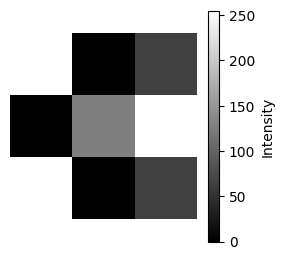

In [30]:
import matplotlib.pyplot as plt

M = np.array([
    [255,0,64],
    [0, 127, 255],
    [255,0, 64]

], dtype=float)

print("Matrix M:\n", M)


plt.figure(figsize=(3, 3))
plt.imshow(M, cmap="gray", interpolation="nearest")
plt.colorbar(label="Intensity")
plt.axis("off")
plt.show()

In this example, the $3 \times 3$ matrix $M$ is treated as a tiny grayscale image, where each entry $M(r, c)$ corresponds to the intensity of one pixel. The `cmap="gray"` argument maps low values to dark shades and high values to bright shades.

### Color images as 3D arrays

Color images (e.g., RGB) extend the grayscale idea by storing three intensity values per pixel, one for each color channel: red, green, and blue.[web:19][web:24] Instead of a single $M \times N$ matrix, an RGB image is commonly represented as a 3D array of shape $M \times N \times 3$.[web:17]

- The first two dimensions $(M, N)$ still index the spatial location $(r, c)$.
- The last dimension indexes the color channel:
  - Channel $0$: Red
  - Channel $1$: Green
  - Channel $2$: Blue

In [24]:
import ipywidgets as widgets
from ipywidgets import interact

def show_pixel(R=255, G=128, B=0):
    # 1x1x3 RGB image
    pixel = np.array([[[R, G, B]]], dtype=np.uint8)

    plt.figure(figsize=(2, 2))
    plt.imshow(pixel)
    plt.title(f"R={R}, G={G}, B={B}")
    plt.axis("off")
    plt.show()

interact(
    show_pixel,
    R=widgets.IntSlider(value=255, min=0, max=255, step=1, description="R"),
    G=widgets.IntSlider(value=128, min=0, max=255, step=1, description="G"),
    B=widgets.IntSlider(value=0,   min=0, max=255, step=1, description="B"),
);

interactive(children=(IntSlider(value=255, description='R', max=255), IntSlider(value=128, description='G', ma…

Conceptually, this can be viewed as three separate matrices:

$$
R, G, B \in \mathbb{R}^{M \times N}
$$

where each matrix stores the intensity for one color component at every pixel. In many numerical libraries (such as NumPy), all three matrices are stacked into a single 3D array to simplify processing.

In [27]:
R = np.array([
    [127, 0, 255],
    [127, 0, 255],
    [127, 0, 255]
], dtype=np.uint8)

G = np.array([
    [255, 127, 0],
    [255, 127, 0],
    [255, 127, 0]
], dtype=np.uint8)

B = np.array([
    [255, 255, 255],
    [127, 127, 127],
    [0, 0, 0]
], dtype=np.uint8)

rgb = np.dstack((R, G, B))
print("rgb.shape:", rgb.shape)

rgb.shape: (3, 3, 3)


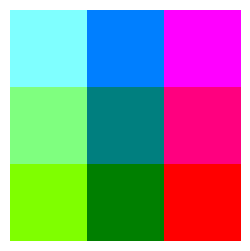

In [29]:
plt.figure(figsize=(3, 3))
plt.imshow(rgb)
plt.axis("off")
plt.show()

### OpenCV

OpenCV (Open Source Computer Vision Library) is an open-source, cross-platform **computer vision** and image processing library used for tasks such as image filtering, feature detection, object tracking, and real-time video analysis.It provides efficient implementations of many classical and modern vision algorithms, with bindings for C++, Python, and other languages, and represents images as matrices (arrays) that integrate naturally with tools like NumPy.

Mathematically, you can think of an image handled by OpenCV as a function
$$
I : \{0, \dots, M-1\} \times \{0, \dots, N-1\} \to \mathbb{R}^k
$$
where $M$ and $N$ are the image height and width, and $k$ is the number of channels (for example, $k = 1$ for grayscale or $k = 3$ for BGR/RGB color images.

- The OpenCV Python bindings are typically installed under the package name `opencv-python` and expose the module `cv2`.
- Images loaded with `cv2.imread` are stored as NumPy arrays, often with shape $(M, N, 3)$ for color images, using the BGR channel order by default.
### Official OpenCV documentation

You can find the official OpenCV documentation, including tutorials and full API references, at:

- **OpenCV Docs (4.x series):** https://docs.opencv.org/4.x/d1/dfb/intro.html  
- **OpenCV main site:** https://opencv.org

OpenCV provides the function `cv2.imread` to load an image from disk into memory as a NumPy array. Conceptually, this gives you a matrix (for grayscale) or a 3D array (for color images) that you can treat as $I(r, c)$ or $I(r, c, k)$ in your image-as-matrix viewpoint.

The basic syntax is:
$$
\text{image} = \text{cv2.imread}(\text{filename}, \text{flags})
$$
where:
- `filename` is the path to the image file.
- `flags` controls how the image is read (color, grayscale, unchanged, etc.).

In [36]:
import cv2

img = cv2.imread("sample.png")
print("Color image shape:", img.shape)

Color image shape: (800, 1200, 3)


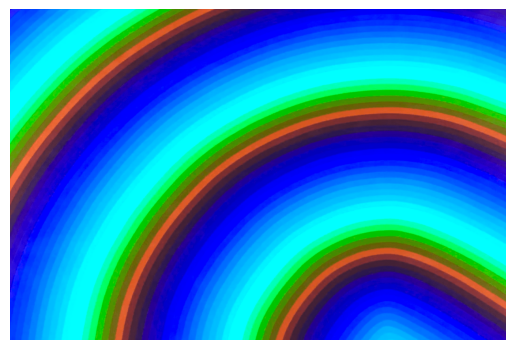

In [37]:
plt.imshow(img)
plt.axis('off')
plt.show()

When you load a color image with `cv2.imread`, the result is a NumPy array with shape
$$
(H, W, C),
$$
where $H$ is the image height (rows), $W$ is the width (columns), and $C$ is the number of channels.For standard 8‑bit color images, this is usually $(H, W, 3)$ and the data type is `uint8` with values in $[0, 255]$.

**Important detail:** OpenCV uses **BGR** (Blue, Green, Red) channel ordering by default, **not** RGB.

- `img[..., 0]` is the **blue** channel.  
- `img[..., 1]` is the **green** channel.  
- `img[..., 2]` is the **red** channel.

This matters because many other libraries assume **RGB** ordering. For example:

- Matplotlib's `plt.imshow` expects RGB; if you pass an OpenCV BGR image directly, the colors will look wrong (reds and blues swapped).
- PIL (`Pillow`) also uses RGB, so converting back and forth between PIL and OpenCV requires swapping channels.

### Color Conversion

The function has the form
$$
\text{dst} = \text{cv2.cvtColor}(\text{src}, \text{code}),
$$
where:
- `src` is the input image (NumPy array) in some source color space.  
- `code` is a constant that specifies the conversion, such as `cv2.COLOR_BGR2GRAY`, `cv2.COLOR_BGR2RGB`, or `cv2.COLOR_BGR2HSV`.[web:38][web:160]

A very common use in Python notebooks is to convert an OpenCV BGR image to RGB before plotting with Matplotlib:

(800, 1200, 3)


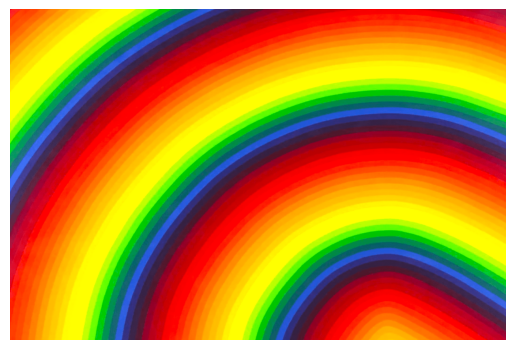

In [42]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

(800, 1200)


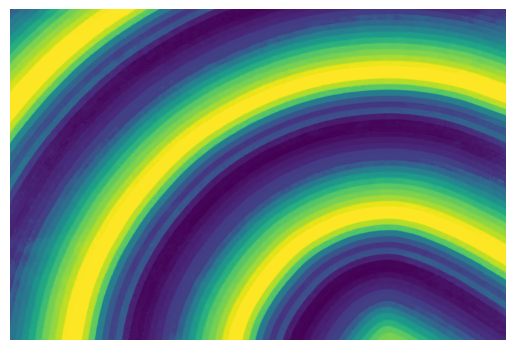

In [43]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)

plt.imshow(img_gray)
plt.axis("off")
plt.show()